investigar los algoritmos de aumento de brillo de una imagen y aplicalos en una imagen haciendo us de python y jypyter

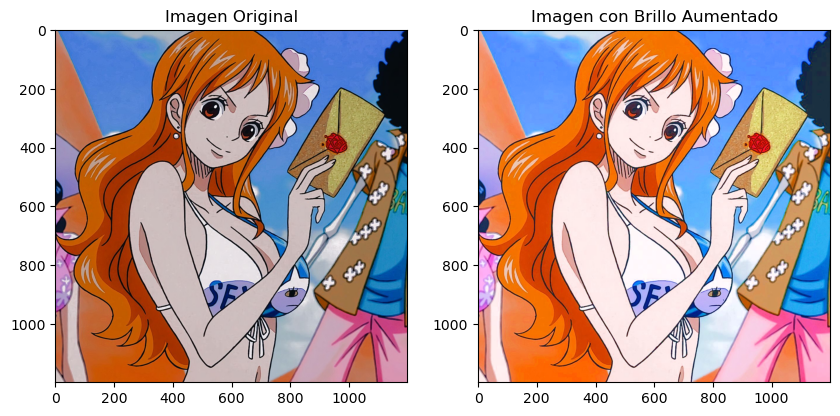

In [1]:
import cv2
import matplotlib.pyplot as plt


def aumentar_brillo(imagen, factor):
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    imagen_hsv[:,:,2] = cv2.add(imagen_hsv[:,:,2], factor)
    imagen_rgb = cv2.cvtColor(imagen_hsv, cv2.COLOR_HSV2RGB)
    return imagen_rgb


imagen_original = cv2.imread('nami.jpg')
imagen_brillante = aumentar_brillo(imagen_original,50)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_brillante)
plt.title('Imagen con Brillo Aumentado')

plt.show()



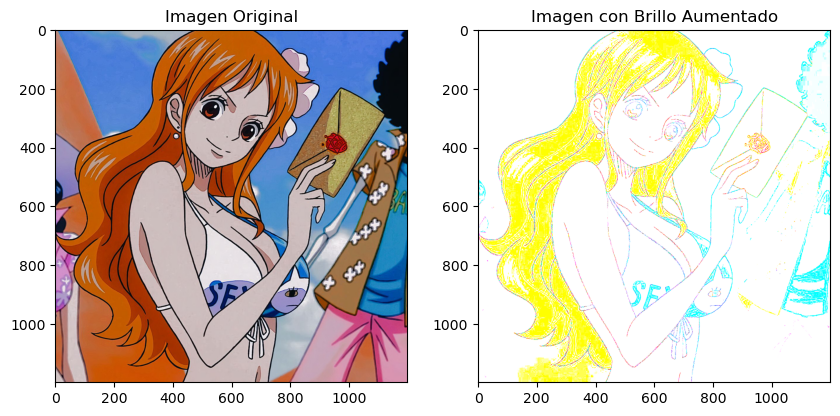

In [28]:
from PIL import Image

def valorPixelAjustado(color, factorBrillo):
    valorEscalado = float(color * (1 + factorBrillo))
    if valorEscalado < 0:
        return 0
    elif valorEscalado > 255:
        return 255
    return int(valorEscalado)
imagen = Image.open("nami.jpg")   
imagenResultado = Image.new('RGB', imagen.size, 0xffffff)
factorBrillo = None
while factorBrillo is None:
    entrada_brillo = input("Ingresa la cantidad de brillo (-1.0 a 1.0): ")
    try:
        factorBrillo = float(entrada_brillo)
    except ValueError:
        print("Por favor, ingresa un número válido.")
ancho, alto = imagen.size
for x in range(ancho):
    for y in range(alto):
        r, g, b = imagen.getpixel((x, y))
        r_actualizado = valorPixelAjustado(r, factorBrillo)
        g_actualizado = valorPixelAjustado(g, factorBrillo)
        b_actualizado = valorPixelAjustado(b, factorBrillo)
        imagenResultado.putpixel((x, y), (r_actualizado, g_actualizado, b_actualizado))
#imagenResultado.save('brilloAjustado.jpg')
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagenResultado)
plt.title('Imagen con Brillo Aumentado')

plt.show()



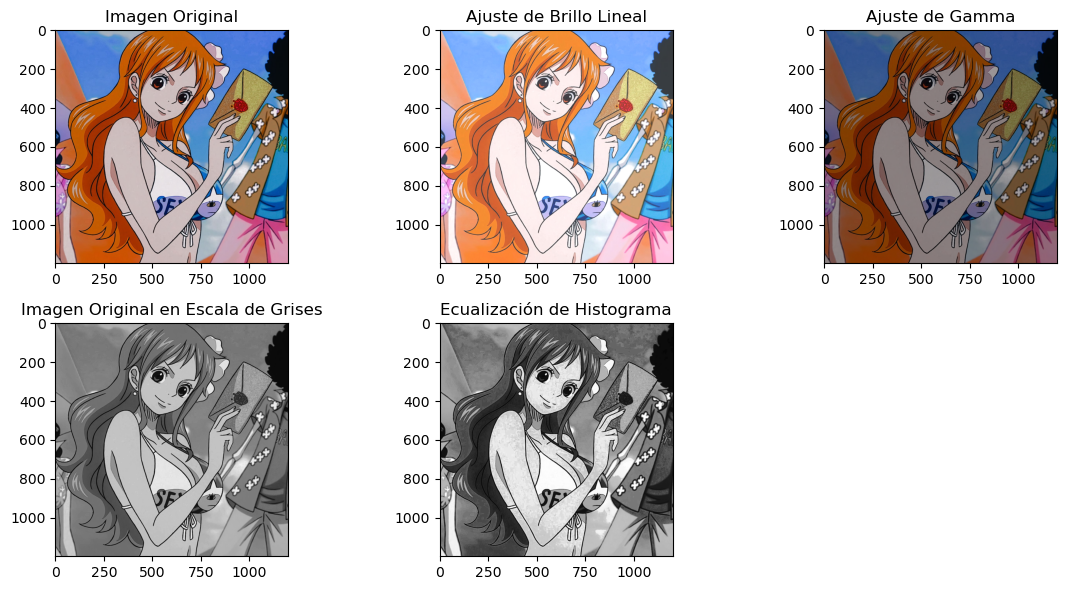

In [29]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('nami.jpg')

# Convertir la imagen a escala de grises 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Ajuste de brillo lineal
brightened_linear = cv2.add(image, 50)  

# Ajuste de gamma
gamma = 1.5
gamma_corrected = cv2.convertScaleAbs(image, alpha=(1/gamma), beta=0)

# Ecualización de histograma
equalized = cv2.equalizeHist(gray_image)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(brightened_linear, cv2.COLOR_BGR2RGB))
plt.title('Ajuste de Brillo Lineal')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.title('Ajuste de Gamma')

plt.subplot(2, 3, 4)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')

plt.subplot(2, 3, 5)
plt.imshow(equalized, cmap='gray')
plt.title('Ecualización de Histograma')

plt.tight_layout()
plt.show()
